In [1]:
from dtwhaclustering.dtw_analysis import dtw_signal_pairs, dtw_clustering
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from dtaidistance import dtw
import pandas as pd
import os
%matplotlib inline 

# default matplotlib parameters
import matplotlib
# font = {'family': 'Times',
#         'weight': 'bold',
#         'size': 22}

# matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')
import seaborn as sns
import ipyplot
import warnings

import os
import sys
sys.stderr = open(os.devnull, "w")  # silence stderr

In [2]:
#load pickle data
dataloc = "pickleFiles"

final_dU=pd.read_pickle(os.path.join(dataloc,"dU_wo_seasn.pickle"))
final_dN=pd.read_pickle(os.path.join(dataloc,"dN_wo_seasn.pickle"))
final_dE=pd.read_pickle(os.path.join(dataloc,"dE_wo_seasn.pickle"))

In [3]:
stn_info_df = pd.read_csv('helper_files/selected_stations_info.txt')
lons = stn_info_df['lon'].values
lats = stn_info_df['lat'].values

In [4]:
final_dU.head()

,DAWU_U,GS36_U,CTOU_U,HSIN_U,GS31_U,SSUN_U,SFON_U,GS23_U,VR03_U,SLNP_U,...,DOSH_U,W029_U,NSHE_U,HUWE_U,SHJU_U,DNAN_U,PKGM_U,SLIN_U,MESN_U,WULU_U
Time,,,,,,,,,,,,,,,,,,,,,
2007-01-01,3.908294,-0.081488,-3.049840,-4.673059,10.533776,-1.476313,8.673984,4.530060,13.409948,-8.877830,...,-19.377178,-3.788125,1.743015,130.023461,8.220618,66.794490,-30.720817,-3.034473,-3.599844,-57.474679
2007-01-02,10.500799,7.948431,1.318779,-0.743764,9.331000,3.753709,6.669562,4.629491,22.623746,3.637930,...,-8.896452,-6.097189,8.503721,137.846113,13.530092,70.849086,-24.866085,-12.179227,-14.733458,-47.341336
2007-01-03,4.008854,6.446352,4.105762,12.184217,9.198563,7.073537,6.987663,13.166624,12.013241,-4.880878,...,-22.097870,9.628858,2.767164,138.107636,16.818000,72.697599,-19.829117,-21.627860,-11.893865,-51.522350
2007-01-04,-0.031345,-0.846752,0.427601,-3.944638,6.705640,-2.433624,6.980915,5.301272,14.671148,-12.261464,...,-18.980924,-11.738634,-0.707047,129.183137,2.833268,66.621516,-31.362671,-29.660110,-19.988452,-59.711777
2007-01-05,-3.235729,2.166184,-3.995197,-6.788471,6.111140,-2.830265,-0.087687,3.937724,14.986668,-6.464705,...,-17.883469,-8.798023,-1.576212,128.433947,-2.769286,68.346757,-28.545909,-29.302730,-39.140370,-84.028366


In [5]:
time_series_U = final_dU.values.transpose()
time_series_N = final_dN.values.transpose()
time_series_E = final_dE.values.transpose()


time_series_U.shape

(115, 4017)

## Significance test of the # of clusters for vertical component using bootstrapping

In [6]:
## instantiate the class
labels = [stnU.split("_")[0] for stnU in final_dU.columns.values] #remove the prefix _U
dtw_cluster_vertical = dtw_clustering(time_series_U,labels=labels, longitudes=lons, latitudes=lats)

In [7]:
opt_cluster, opt_distance = dtw_cluster_vertical.optimum_cluster_elbow()
opt_cluster, opt_distance

(5, 1350.923006751062)

In [8]:
df_cv, df_accl = dtw_cluster_vertical.compute_distance_accl()

In [9]:
vert_sim_accl, _ = dtw_cluster_vertical.significance_test(numsimulations=0, outfile='pickleFiles/dU_accl_sim_results.pickle', fresh_start=False)

Simulation started...


In [10]:
vert_sim_accl.head()

,accl_0,accl_1,accl_2,accl_3,accl_4,accl_5,accl_6,accl_7,accl_8,accl_9,...,accl_90,accl_91,accl_92,accl_93,accl_94,accl_95,accl_96,accl_97,accl_98,accl_99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-5.504795,-3.370657,-13.724642,-8.423487,-13.930517,-7.181333,-16.832447,-17.084107,-11.713108,-15.562328,...,-3.391673,-11.458538,-10.954918,-10.706111,-8.070752,-13.685424,-8.057746,-9.836619,-8.824411,-14.396021
3,13.222464,6.681928,14.183309,7.192979,15.597055,10.693033,19.203320,20.329192,15.107834,16.803173,...,2.945827,13.464991,13.510254,15.346689,10.712462,15.120871,13.524711,13.151834,3.286420,15.686691
4,-11.716906,-4.501481,-8.238530,-3.430334,-11.868268,-8.639646,-9.858624,-12.235660,-10.485557,-6.531977,...,-3.992377,-7.214982,-6.039272,-9.649469,-10.885103,-19.012510,-7.731090,-10.563611,-0.519218,-8.422627


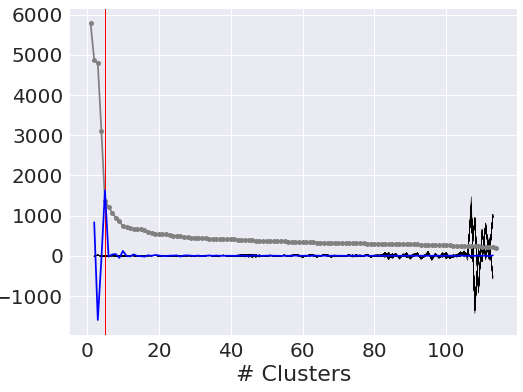

In [73]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(8,6))
    vert_sim_accl.plot(legend=False, color='k', lw=0.5, ax=ax)
    
    ax.plot(df_cv["level"], df_cv["distance"],
                "-o", color='gray',ms=5)
    ax.axvline(x=opt_cluster, color='r', lw=1)
    ax.plot(
                df_accl["level"],
                df_accl["accln"],
                "-",
                color='b',
                label='# Orig clusters',
            )
    
    
    ax.set_xlabel('# Clusters', fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("vert-monte-simulation.pdf",bbox_inches='tight')


## Significance test of the # of clusters for north component using bootstrapping

In [12]:
dtw_cluster_north = dtw_clustering(time_series_N,labels=labels, longitudes=lons, latitudes=lats)
opt_cluster_north, opt_distance_north = dtw_cluster_north.optimum_cluster_elbow()
df_cv_north, df_accl_north = dtw_cluster_north.compute_distance_accl()


In [13]:
nor_sim_accl, _ = dtw_cluster_north.significance_test(numsimulations=0, outfile='pickleFiles/dN_accl_sim_results.pickle', fresh_start=False)

Simulation started...


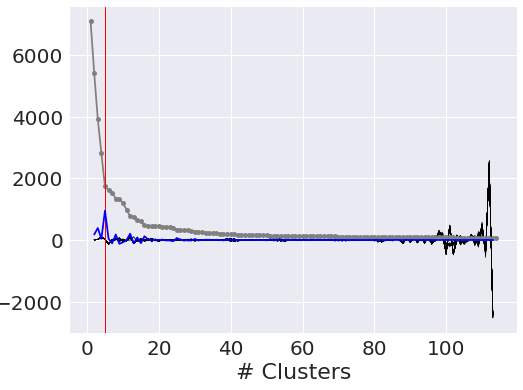

In [71]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(8,6))
    nor_sim_accl.plot(legend=False, color='k', lw=0.5, ax=ax)
    ax.plot(df_cv_north["level"], df_cv_north["distance"],
                "-o", color='gray', ms=5)
    ax.axvline(x=opt_cluster_north,color='r', lw=1)
    ax.plot(
                df_accl_north["level"],
                df_accl_north["accln"],
                "-",
                color='b',
                label='# Orig clusters',
            )
    
    ax.set_xlabel('# Clusters', fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("north-monte-simulation.pdf",bbox_inches='tight')



## Significance test of the # of clusters for east component using bootstrapping

In [15]:
dtw_cluster_east = dtw_clustering(time_series_E,labels=labels, longitudes=lons, latitudes=lats)
opt_cluster_east, opt_distance_east = dtw_cluster_east.optimum_cluster_elbow()
df_cv_east, df_accl_east = dtw_cluster_east.compute_distance_accl()


In [16]:
east_sim_accl, _ = dtw_cluster_east.significance_test(numsimulations=0, outfile='pickleFiles/dE_accl_sim_results.pickle', fresh_start=False)

Simulation started...


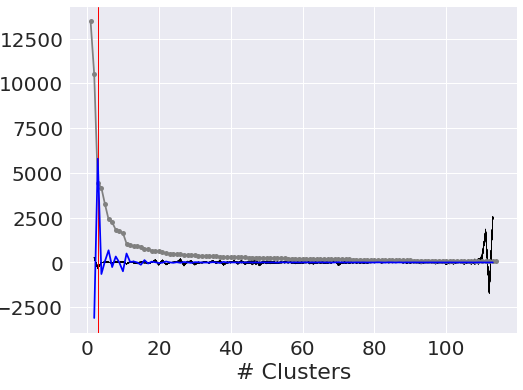

In [72]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(8,6))
    east_sim_accl.plot(legend=False, color='k', lw=0.5, ax=ax)
    ax.plot(df_cv_east["level"], df_cv_east["distance"],
                "-o", color='gray', ms=5)
    ax.axvline(x=opt_cluster_east, color='r', lw=1)
    ax.plot(
                df_accl_east["level"],
                df_accl_east["accln"],
                "-",
                color='b',
                label='# Orig clusters',
            )
    
    ax.set_xlabel('# Clusters', fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("east-monte-simulation.pdf",bbox_inches='tight')